# load cvc file through panadas 

In [4]:
import pandas as pd  

# CSV file load karna
df = pd.read_csv(r"C:\Users\hp\Desktop\Intern_projects\Coca-Cola-Stock-Project\Coca-Cola-Stock-Project\data\Coca-Cola_stock_history.csv")

# Pehle 5 rows dekhna
print(df.head())


         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  


# Steps for EDA:
1️⃣ Check basic dataset information:

In [5]:
print(df.info())  # Shows data types and missing values
print(df.describe())  # Provides summary statistics of numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB
None
               Open          High           Low         Close        Volume  \
count  15311.000000  15311.000000  15311.000000  15311.000000  1.531100e+04   
mean      11.812883     11.906708     11.717375     11.815409  9.139213e+06   
std       15.025726     15.133336     14.915580     15.026316  7.957947e+06   
min        0.037154      0.037279      0.034890      0.037028  7.680000e+04  

2️⃣ Check for missing values and duplicates:



In [6]:
print(df.isnull().sum())  # Counts missing values in each column
print(df.duplicated().sum())  # Counts duplicate rows


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
0


3️⃣ Understand the dataset structure:

In [7]:
print(df.columns)  # Displays column names
print(df.head())  # Shows the first 5 rows of the dataset
print(df.tail())  # Shows the last 5 rows


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  
                            Date       Open       High        Low      Close  \
15306  2022-10-20 00:00:00-04:00  55.770000  55.919998  54.959999  55.080002   
15307  2022-10-21 00:00:00-04:00  55.000000  56.110001  54.990002  55.959999   
15308  2022-10-24 00:00:00-04:00  56.639999  57.730000  56.570000  57.570

4️⃣ Basic visualization (optional, but useful)

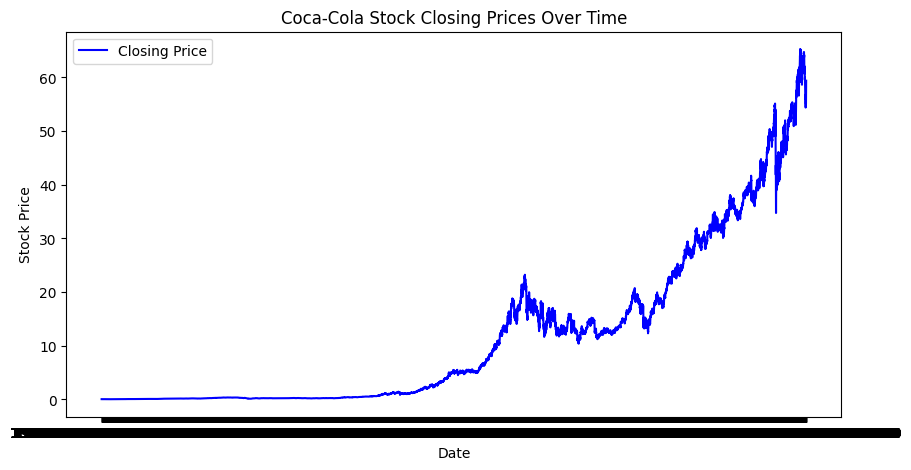

In [8]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Coca-Cola Stock Closing Prices Over Time')
plt.legend()
plt.show()


## Step 2: Data Collection
 Use Yahoo Finance API for historical data. We'll fetch data from 2015 to the present
 

In [7]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import yfinance as yf
import pandas as pd
 # Fetch Coca-Cola stock data
ticker = 'KO' # Coca-Cola stock ticker
data = yf.download(ticker, start='2015-01-01',
end='2023-12-31')
 # Reset index for easier handling
data.reset_index(inplace=True)
 # Display data structure
print(data.info())
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2264 non-null   datetime64[ns]
 1   (Close, KO)   2264 non-null   float64       
 2   (High, KO)    2264 non-null   float64       
 3   (Low, KO)     2264 non-null   float64       
 4   (Open, KO)    2264 non-null   float64       
 5   (Volume, KO)  2264 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.3 KB
None
Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.437500  30.625298  30.191920  30.524175   9921100
1      2015-01-05  30.437500  31.037006  30.394164  30.834762  26292600
2      2015-01-06  30.668617  31.015318  30.509714  30.632503  16897500
3      2015-01-07  31.051456  31.138131  30.755316  30.914

## Step 3: Data Cleaning
 3.1 Handle Missing Values

 
 ● Check for missing values and decide on imputation or deletion

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing numerical values with the column mean (forward fill for stock data continuity)
data.fillna(method='ffill', inplace=True)

# Replace any remaining missing values (like splits/dividends) with 0
data.fillna(0, inplace=True)

# Confirm no missing values remain
print(data.isnull().sum())


Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64
Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_10532\797912923.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# visualize the stock data 📊

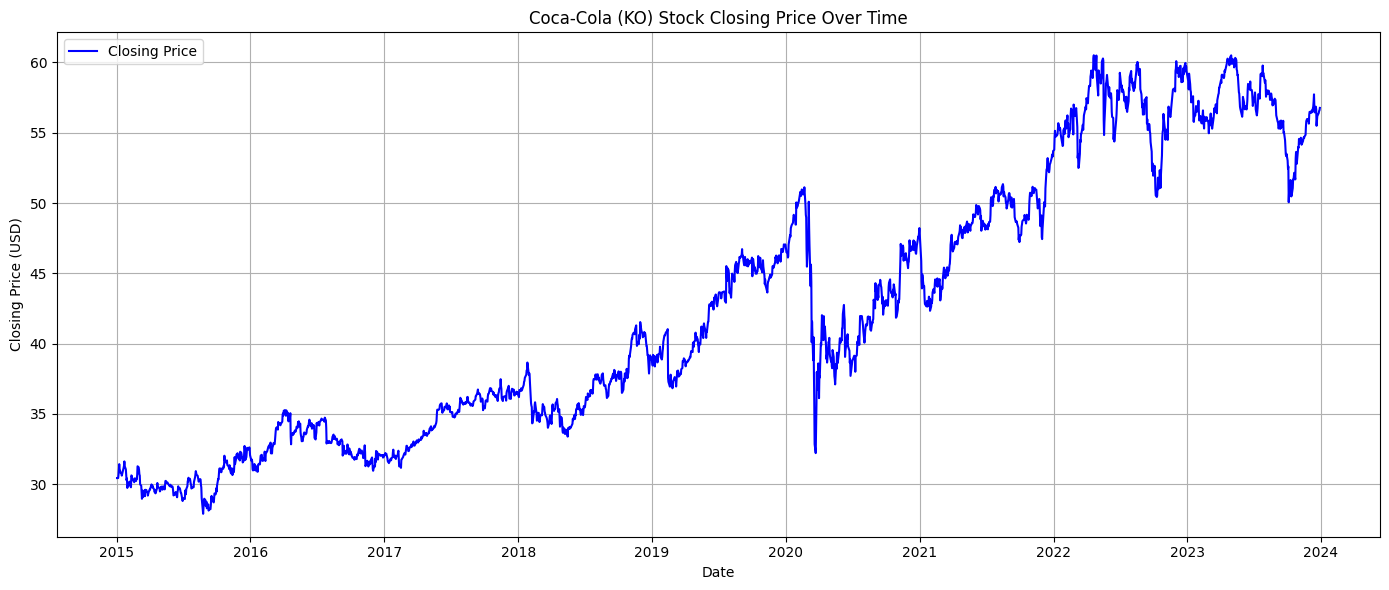

In [4]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 6))

# Plot the closing price
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')

# Add title and labels
plt.title('Coca-Cola (KO) Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
